In [10]:
import shap
import numpy as np
import tensorflow
import matplotlib.pyplot as plt

# Load the trained MobileNetV2 model
model = tensorflow.keras.models.load_model("mobilenet_final_model2.keras")

# Check model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,776,389 (10.59 MB)

 Trainable params: 172,673 (674.50 KB)

 Non-trainable params: 2,258,368 (8.61 MB)

 Optimizer params: 345,348 (1.32 MB)

In [11]:
import cv2

# Load and preprocess a sample image
img_path = "/Users/mandylee/Documents/AI/baby.jpg"
img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))  # Resize to match MobileNetV2 input
img = img / 255.0  # Normalize
img = np.expand_dims(img, axis=0)  # Add batch dimension

/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=['Tensor(shape=(1, 224, 224, 3))']
  warnings.warn(msg)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=['Tensor(shape=(50, 224, 224, 3))']
  warnings.warn(msg)


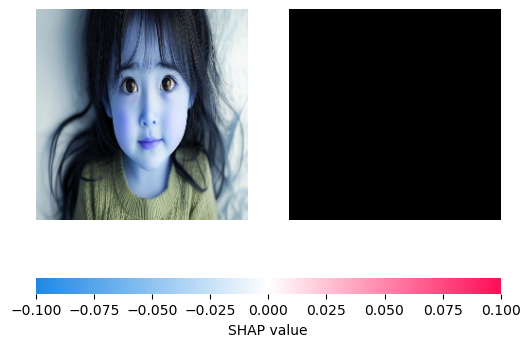

In [12]:
explainer = shap.GradientExplainer(model, img)  # Use the input image itself as background
shap_values = explainer.shap_values(img)
shap.image_plot(shap_values, img)

In [13]:
import numpy as np

# Compute SHAP values
explainer = shap.GradientExplainer(model, img)  
shap_values = explainer.shap_values(img)  # This returns a list if multi-class

# Convert SHAP values to a textual summary
summary = "SHAP Values Summary:\n"

if isinstance(shap_values, list):  # Multi-class case
    for i, values in enumerate(shap_values):
        mean_shap = np.mean(np.abs(values), axis=(1, 2, 3))  # Aggregate importance per channel
        summary += f"Class {i} - Mean Absolute SHAP per Channel (R,G,B): {mean_shap}\n"
else:  # Single-class case
    mean_shap = np.mean(np.abs(shap_values), axis=(1, 2, 3))
    summary += f"Mean Absolute SHAP per Channel (R,G,B): {mean_shap}\n"

print(summary)

E0000 00:00:1742310774.610906 2057646 meta_optimizer.cc:967] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


SHAP Values Summary:
Mean Absolute SHAP per Channel (R,G,B): [[0.]]



In [14]:
print("SHAP values for class 0 (fake):", np.mean(shap_values[0]))
print("SHAP values for class 1 (real):", np.mean(shap_values[1]))


SHAP values for class 0 (fake): 0.0


IndexError: index 1 is out of bounds for axis 0 with size 1